# Data Exploration for Healthcare Chatbot

This notebook provides an exploratory data analysis (EDA) of the **Training.csv** dataset used to train the healthcare diagnostic chatbot. Make sure that the file is located at `Data/Training.csv` relative to this notebook before running all cells.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:

# Load the training data
path = 'Data/Training.csv'
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    raise FileNotFoundError(f'Cannot find {path}. Please place the Training.csv file in the Data/ folder.')
print(f'Dataset loaded with shape: {df.shape}')


Dataset loaded with shape: (4920, 133)


In [9]:

# Basic structure
print('First 10 Column names:')
print(list(df.columns)[:10])
print(f"Number of feature (symptom) columns: {df.shape[1]-1}")
print(f"Preview of data:")
print(df.head())


First 10 Column names:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue']
Number of feature (symptom) columns: 132
Preview of data:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3   

Disease distribution:
prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                 

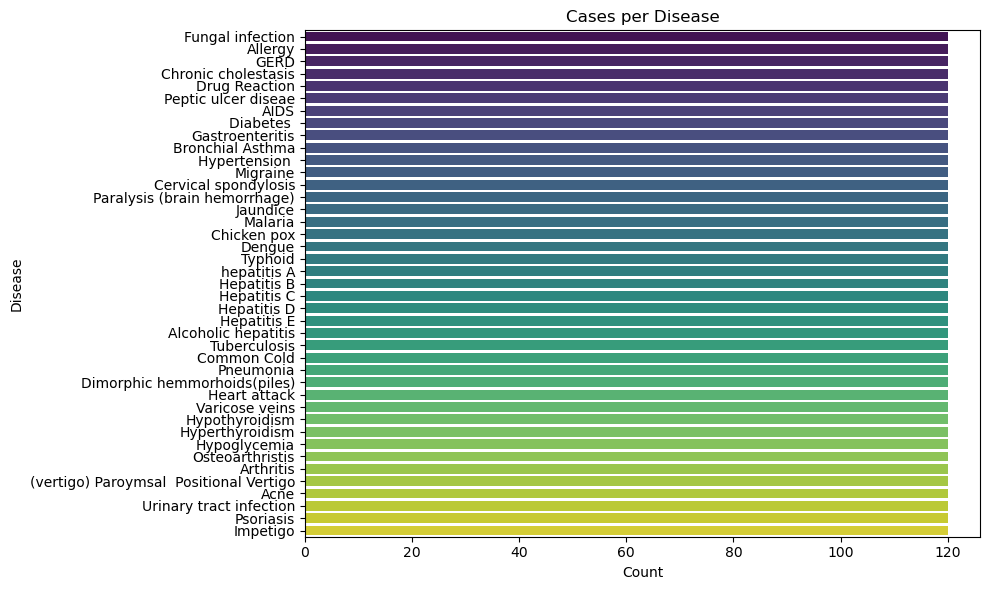

In [6]:

# Distribution of target labels (prognosis)
disease_counts = df['prognosis'].value_counts().sort_values(ascending=False)
print('Disease distribution:')
print(disease_counts)

plt.figure(figsize=(10,6))
sns.barplot(y=disease_counts.index, x=disease_counts.values, palette='viridis')
plt.title('Cases per Disease')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()


Top 20 most common symptoms:
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
skin_rash             786
malaise               702
chest_pain            696
joint_pain            684
sweating              678
itching               678
dark_urine            570
cough                 564
diarrhoea             564
muscle_pain           474
dtype: int64


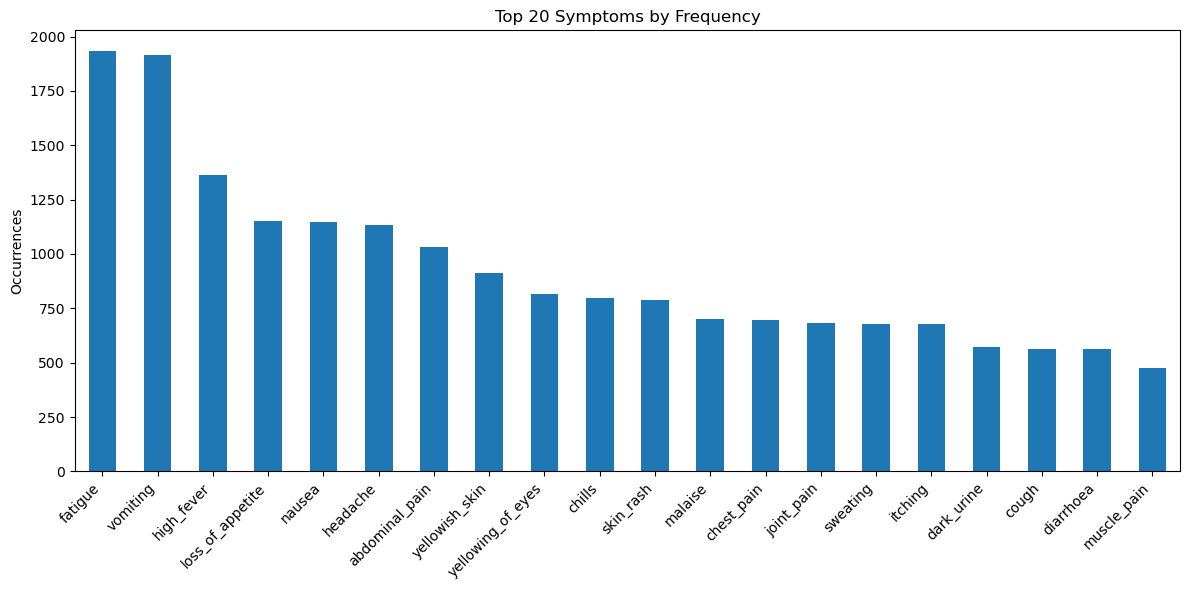

In [7]:

# Frequency of each symptom across the dataset
symptoms = df.columns[:-1]
frequency = df[symptoms].sum().sort_values(ascending=False)
print('Top 20 most common symptoms:')
print(frequency.head(20))

plt.figure(figsize=(12,6))
frequency.head(20).plot(kind='bar')
plt.title('Top 20 Symptoms by Frequency')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

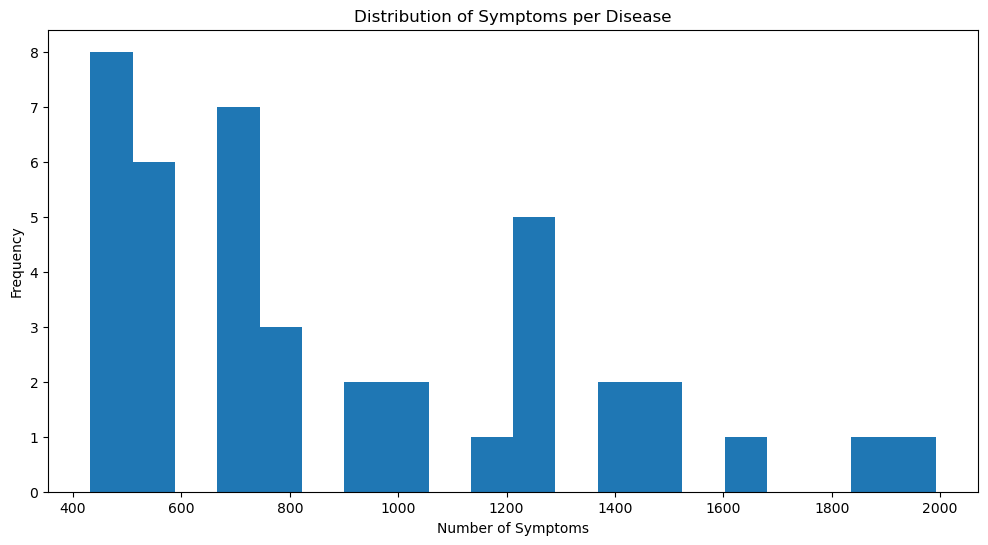

In [11]:
# Symptoms per disease
plt.figure(figsize=(12,6))
symptoms_per_disease = df.groupby('prognosis')[symptoms].sum().sum(axis=1)
symptoms_per_disease.plot(kind='hist', bins=20)
plt.title('Distribution of Symptoms per Disease')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')

In [8]:

# Check for missing values
missing = df.isnull().sum()
print('Missing values per column (non-zero only):')
print(missing[missing>0])


Missing values per column (non-zero only):
Series([], dtype: int64)
